#intro

En reunion sur le sujet du bruit ajouté par un attenuateur (ou filtre) apres l'antenne et juste avant l'ampli 
j annoncé dans temperature de 100K pour une attenuation de 0.5dB.  
**je me suis trompé c est environ 40K qui sont rajoutés**  
Voila quelques explications:

#pourquoi je me suis trompé

Le noise figure est defini comme le rapport du signal sur bruit a l'entree sur celui de la sortie.  
Si on prend une antenne et un attenuateur:

\begin{equation}
    NF = \frac{SNR_{in}}{SNR_{out}} = \frac{\frac{S}{k.T_{ant}.B}}{\frac{S.A}{k.T_{ant}.A + k.T_{phys}.(1-A)}}
\end{equation}

avec:  
\begin{equation}
    SNR_{in} = \frac{S}{k.T_{ant}.B}
\end{equation}
ou S est le signal et $T_{ant}$ temperature d'antenne  
et
\begin{equation}
    SNR_{out} = \frac{S.A}{k.T_{ant}.A + k.T_{phys}.(1-A)}
\end{equation}

ou A est "le gain" de l'attenuateur i.e. la fraction de puissance qui passe, la puissance de bruit ajouté par l'attenuateur est (temperature physique x la fraction de puissance dissipée).  
De la on a:

\begin{equation}
    NF = 1+ \frac{T_{phys}}{T_{ant}}.(\frac{1-A}{A})
\end{equation}
Donc le noise facteur explose quand on a une temperature d'antenne basse.  
ex: $T_{phys} =290K$, $T_{ant} = 10K$, $A_{dB} = -0.5dB$ i.e. $A = 0.89$  NF = 4.58 ou $NF_{dB} = 6.6dB$ 
(et T = (NF-1)$T_{0}$ = 1000K avec $T_{0} = 290K$ cf. definition du noise figure.)

Ce qui est encore plus que ce que j'annoncais.  
C est en fait que j'ai pris differentes definitions qui correspondent pas les unes avec les autres.
Le calcul du facteur de bruit est correct mais sa conversion en temperature est fausse parce qu ici ce n'est pas un noise figure normalisé par rapport a 290K.

#calcul de base:

Si on revient a la base et qu on calcule par exemple le SNR pour un systeme: antenne + attenuateur + ampli:

Apres l'antenne:
\begin{equation}
    P_{sig} = S_{in} \ et \  P_{Noise} = kT_{ant}.B
\end{equation}


Apres l'attenuateur de gain A:
\begin{equation}
    P_{sig} = S_{in}.A \ et \  P_{Noise} = kT_{ant}.B.A +  k.T_{phys}.(1-A)
\end{equation}


Apres l'ampli de gain G:
\begin{equation}
     P_{sig} = S_{in}.A.G \ et \ P_{Noise} = k.B.T_{ant}.A.G +  k.B.T_{phys}.(1-A).G + k.B.T_{LNA}.G
\end{equation}


le signal/bruit apres le systeme vaut donc:
\begin{equation}
    SNR_{tot} = \frac{S_{in}.A.G}{k.B.T_{ant}.A.G +  k.B.T_{phys}.(1-A).G + k.B.T_{LNA}.G}
\end{equation}

\begin{equation}
    SNR_{tot} = \frac{S_{in}}{k.B.T_{ant}+  k.B.T_{phys}.\frac{(1-A)}{A} + k.B.\frac{T_{LNA} }{A}}
\end{equation}

Donc la quantité qui nous interesse est la temperature systeme totale:
\begin{equation}
   \boxed{ T_{sys} =  T_{ant} +  T_{phys}.\frac{(1-A)}{A} +\frac{T_{LNA} }{A}}
\end{equation}

D'apres la mesure du noise figure du LNA on a NF = 0.7dB i.e. $T_{LNA} = 50.7 K$ (ici on peut convertir en temperature, parce que ici le NF est normalise à 290K, c est la degradation du SNR si on a en entree du LNA 290K).  
Du coup avec $T_{ant} = 10K$ $A = 0.89 (A_{dB} = 0.5dB)$ et $T_{phys} = 290K$ et $T_{LNA} = 50.7K$ on obtient: 


\begin{equation}
    T_{sys} = 10 + 35.8 + 56.9 = 102.7 K
\end{equation}






Et dans le livre de Kraus, "Antennas", il a bien la meme formule:

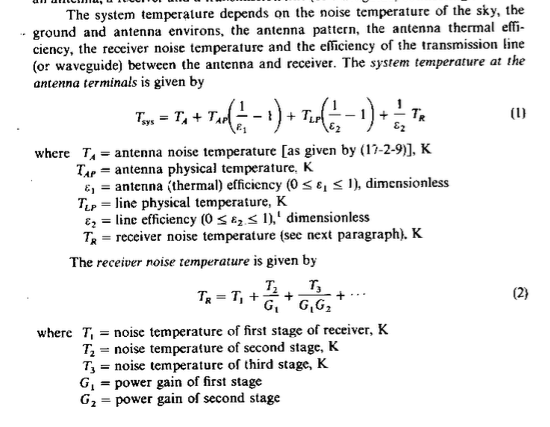

In [5]:
from IPython.display import Image
Image(filename='kraus_temperature.png')

#dans notre cas:

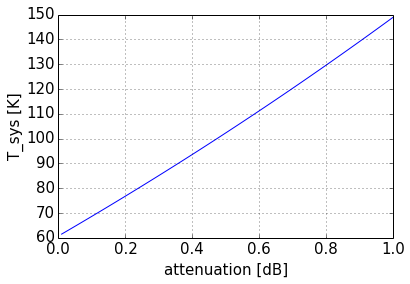

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
att_dB = np.linspace(0.01,1,100)
att_lin = np.power(10,-att_dB/10)
#print att_lin
T_ant = 10
T_lna = 50.7
T_phys = 290
T_sys = T_ant + ((1-att_lin)/att_lin)*T_phys + T_lna/att_lin
plt.plot(att_dB,T_sys)
plt.xlabel('attenuation [dB]')
plt.ylabel('T_sys [K]')
plt.grid()